# Task 1)

a) We made the decision to plot the life expectancy on the X-axis and the GDP per capita on the Y-axis. We made the this decision as we wanted to investigate if we could find a correlation between a person life expectancy and their respective countries GBP per capita. As GBP is one way measuring prosperity in a country we assumed that higher GDP per capita would imply a higher standard of living and thus also corelate to public health and a higher life expectancy.

We first decided to plot the life expectancy and the GDP per capita with all matching years of the two data sets, as we wanted to investigate earlier years data. As earlier in the past, health care was not as developed as it is today, and we assume that a strong economy might not necessary imply a longer life expectancy. 

We also made the choices of plotting the life expectancy and the GDP per capita of the latest matching year of the two data sets, as we wanted to investigate the newest data. Where we assume that a strong economy would imply a longer life expectancy. 


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv

#Function for reading CSV-file
def readFile(f):
    #
    with open(f) as file:
        result = []
        reader = csv.reader(file)
        for row in reader:
            result.append(row)
    return result

#Function for creating a list with matching data on the year and contry from both data sets
def dataCollector():
    gdp = readFile('gdp-per-capita-worldbank.csv')
    lifeExp = readFile('life-expectancy.csv')
    gdp = makeDict(gdp)
    lifeExp = makeDict(lifeExp)

    result = []
    for key in gdp:
        if key in lifeExp:
            result.append([key,gdp[key],lifeExp[key]])
    return result



#Creates a dictrionary from a list, is used for better time complexity
def makeDict(l):
    l.pop(0)
    result = {}
    for rows in l:
        result[rows[0] + rows[2]] = rows[3]
    return result

#Function for writing to a new CSV file, is used to grab the columns we need
def writeToCSV(l,fileName):
    with open(fileName,'w') as file:
        writer = csv.writer(file)
        header =['Country','GDP per capita','Life expectancy']
        writer.writerow(header)
        
        for row in l:
            writer.writerow(row)

writeToCSV(dataCollector(),'outputAll.csv')

#Function for getting the newest available matching data on country and year
def getLatest():
    rows = dataCollector()
    result = []
    tmp=[""]
    slicer = slice(-4)
    for row in reversed(rows):
        if row[0][slicer] != tmp:
            result.insert(0,row)
            tmp = row[0][slicer]
    return result

writeToCSV(getLatest(),'outputLatest.csv')

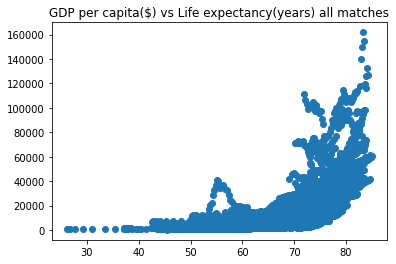

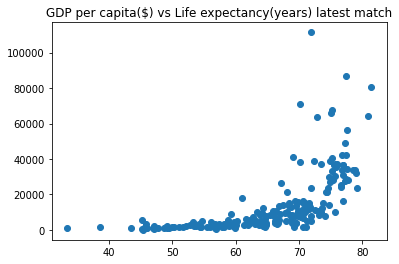

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Function for plotting data
def plotData(inputFile,plotTitle):
    cleanedData = pd.read_csv(inputFile)

    gdpData = cleanedData['GDP per capita']
    lifeData = cleanedData['Life expectancy']

    gdpData = list(map(float, gdpData))
    lifeData = list(map(float, lifeData))

    plt.scatter(lifeData, gdpData)
    plt.title(plotTitle)
    plt.show()


plotData('outputAll.csv', 'GDP per capita($) vs Life expectancy(years) all matches')
plotData('outputLatest.csv', 'GDP per capita($) vs Life expectancy(years) latest match')

1b)
The first scatter plot shows the life expectancy and GDP per capita for all common years of the two data sets. The scatter plot can be interpreted to show a corelation between GDP per capita and life expectancy where a higher GDP per capita corelate to a higher life expectancy. This is reasonable in our opinion a country with a more developed economy it is reasonable to assume that they also have a more developed healthcare system. With a higher GDP per capita the assumption could be made that the country is also more developed in a social context. Another observation is that we noticed a break point around the life expectancy between 70 and 80. 

The second scatter plot show the life expectancy and GDP per capita for the latest matching year of the two data sets. This scatter plot is very similar to the first one, and the noticed break point between 70 and 80 could be explained as that healthcare has largely improved overall over time, but when reaching the age between 70 to 80 a stronger economy might be essential to treat for instance diseases that arise at the later stages of life. 

We also discussed that we assumed that the plot of all the matching years, would give us some form of indication of that the correlation between life expectancy and GDP per capita as the healthcare system was not as developed. We also tried plotting the earliest matching year to investigate, but realized that this is not really representative due to the largely inconsistent data sets. A lot of countries have data for the life expectancy reaching far back in time, but only have data for GDP per capita for the latest few years, thus resulting in a misleading plot. 

Thus we believe that the most relevant plot is the one with the latest data.

1c) To be able to investigate the questions above, we had to do some data cleaning. For the first plot we removed all row entries that did not have a matching year for the data in the two data sets. For the second plot we discarded every row except for the row with the latest matching year for both the data sets. 

For question d,e,f and g we did not do any additional data cleaning, as it was not necessary as we used the same cleaned data set we used for the scatter plots. 

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

def readFile(f):
    
    with open(f) as file:
        result = []
        reader = csv.reader(file)
        for row in reader:
            result.append(row)
    return result


def dataCollector():
    gdp = readFile('gdp-per-capita-worldbank.csv')
    lifeExp = readFile('life-expectancy.csv')
    gdp = makeDict(gdp)
    lifeExp = makeDict(lifeExp)

    result = []
    for key in gdp:
        if key in lifeExp:
            result.append([key,gdp[key],lifeExp[key]])
    return result


def makeDict(l):
    l.pop(0)
    result = {}
    for rows in l:
        result[rows[0] + rows[2]] = rows[3]
    return result

def writeToCSV(l,fileName):
    with open(fileName,'w') as file:
        writer = csv.writer(file)
        header =['Country','GDP per capita','Life expectancy']
        writer.writerow(header)
                
        for row in l:
            writer.writerow(row)

writeToCSV(dataCollector(),'outputAll.csv')


def getLatest():
    rows = dataCollector()
    result = []
    tmp=[""]
    slicer = slice(-4)
    for row in reversed(rows):
        if row[0][slicer] != tmp:
            result.insert(0,row)
            tmp = row[0][slicer]
    return result

writeToCSV(getLatest(),'outputLatest.csv')

#Function for creating the list of countries needed to answer 1d, 1e and 1e and also prints the lists.
def getStatistics():
    data = getLatest()

    n = len(data)
    lifeexp = [float(x[2]) for x in data]
    meanLife = sum(lifeexp)/n
    print('meanLife:',meanLife)

    #Found how to calculate this online 
    #https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/
    deviationsLife = [(x - meanLife) ** 2 for x in lifeexp]
    varianceLife = sum(deviationsLife)/n
    oneStandLife = np.sqrt(varianceLife)

    #List for all countries that has a life expectancy higher than the mean
    aboveMeanLife = []
    for i in range(len(data)):
        if lifeexp[i] > (meanLife + oneStandLife):
            aboveMeanLife.append(data[i][0])
    print(aboveMeanLife)

    gdp = [float(x[1]) for x in data]
    meanGdp = sum(gdp) / n
    print('meanGDP:',meanGdp)

    #List for all countries that has a life expectancy higher than the mean and a GDP below the mean.
    aboveLifeBelowGDP = []
    for i in range(len(data)):
        if lifeexp[i] > meanLife and gdp[i] < meanGdp:
            aboveLifeBelowGDP.append(data[i][0])
    
    print(aboveLifeBelowGDP)
    
    print("Countries with a GDP above mean, life expectancy below mean")
    #List for all countries that has a GDP above mean and a life expectancy below the mean
    aboveGdpBelowLife = []
    for i in range(len(data)):
        if lifeexp[i] < meanLife and gdp[i] > meanGdp:
            aboveGdpBelowLife.append(data[i][0])
    print(aboveGdpBelowLife)
    
getStatistics()


meanLife: 72.94283505154641
['Australia2019', 'Austria2019', 'Belgium2019', 'Bermuda2019', 'Canada2019', 'Cayman Islands2019', 'Cyprus2019', 'Denmark2019', 'Finland2019', 'France2019', 'Germany2019', 'Greece2019', 'Hong Kong2019', 'Iceland2019', 'Ireland2019', 'Israel2019', 'Italy2019', 'Japan2019', 'Luxembourg2019', 'Macao2019', 'Malta2019', 'Netherlands2019', 'New Zealand2019', 'Norway2019', 'Portugal2019', 'San Marino2019', 'Singapore2019', 'Slovenia2019', 'South Korea2019', 'Spain2019', 'Sweden2019', 'Switzerland2019', 'United Kingdom2019']
meanGDP: 22033.498690128774
['Albania2019', 'Algeria2019', 'Antigua and Barbuda2019', 'Armenia2019', 'Azerbaijan2019', 'Barbados2019', 'Belarus2019', 'Belize2019', 'Bosnia and Herzegovina2019', 'Brazil2019', 'Cape Verde2019', 'China2019', 'Colombia2019', 'Costa Rica2019', 'Dominica2019', 'Dominican Republic2019', 'Ecuador2019', 'El Salvador2019', 'Georgia2019', 'Guatemala2019', 'Honduras2019', 'Iran2019', 'Jamaica2019', 'Jordan2019', 'Lebanon201

1d) The first print above contains an array with the countries that have a life expectancy one standard deviation above the mean.

1e) The second print above contains an array with the countries that has a higher life expectancy than the mean and a lower GDP than the mean. 

1f) For the latest matching data on year, it is only Russia that does have a GDP above the mean and life expectancy below the mean.

1g) If we were to view as GDP per capita as an indicator of a strong economy in relation to a countries life expectancy, from our results in question e and question f, we can argue for the following:

In question e we have a set of countries that has a GDP per capita below the mean, but still has a life expectancy above the mean. Thus we can argue that there are additional factors that can affect the life expectancy and that the correlation between a high GDP per capita(if we view it as a indicator of a strong economy) and the life expectancy is not absolute. 

The same goes for the result in question f, although it is a very small outlier as it is only one country. 

So to summarize, a higher GDP per capita seem to strongly indicate a higher life expectancy, while a lower GDP somewhat seem to indicate a lower life expectancy.


# Task2

For task 2, we found it interesting to investigate the following:

- If there is a correlation between a countries Gini index and the perceived corruption

- If there is a correlation between a countries alcohol consumption and the countries poverty level. 

- Are there any outliers in scatter plots? And what might be cause of the outliers? 

Thus we decided to plot the Gini coefficient on one axis and the perceived corruption on the other axis for the first plot. We decided to plot the alcohol consumption on one axis and the poverty level on the other axis. We made these decisions for the plots to investigate the questions above.

Our approach when combining the data and selecting what columns to plot on the x-axis and the y-axis of the is very similar to the approach we used in task 1. For our first data set, we decided to combine the data on the the common years that existed in both of the data sets that were to be compared. For the data cleaning, we discarded every column except the year, country and the columns that we wanted to investigate a correlation between, according to the questions above. For the second data set, we once again wanted to investigate the latest common data based on the year. So we discarded all entries that was not the latest matching year. 

As the Gini index indicates the wealth inequality in a country we believe it is reasonable to assume that a worse Gini coefficient could imply a higher rate of perceived corruption.

For the comparison between alcohol consumption, on the one hand a case could be made for the assumption that countries with lower poverty rate will have more dispensable income for drinking alcohol. But on the other hand, the assumption that countries with a higher poverty rate might also have a higher rate of alcohol consumption to deal with worse living conditions.



In [4]:
import numpy as np
import csv
import pandas as pd

def readFile(f):
    with open(f) as file:
        result = []
        reader = csv.reader(file)
        for row in reader:
            result.append(row)
    return result


def dataCollector():
    curr = readFile('corruption-perception-index.csv')
    gini = readFile('gini-index.csv')
    gini = makeDict(gini)
    curr = makeDict(curr)

    result = []
    for key in curr:
        if key in gini:
            result.append([key,curr[key],gini[key]])
    return result

def makeDict(l):
    l.pop(0)
    result = {}
    for rows in l:
        result[rows[0] + rows[2]] = rows[3]
    return result

def writeToCSV(l,fileName):
    with open(fileName,'w') as file:
        writer = csv.writer(file)
        header =['Country','Curruption','Gini']
        writer.writerow(header)
                
        for row in l:
            writer.writerow(row)

writeToCSV(dataCollector(),'currGiniAll.csv')


def getLatest():
    rows = dataCollector()
    result = []
    tmp=[""]
    slicer = slice(-4)
    for row in reversed(rows):
        if row[0][slicer] != tmp:
            result.insert(0,row)
            tmp = row[0][slicer]
    return result

writeToCSV(getLatest(),'currGiniLatest.csv')
writeToCSV(dataCollector(), 'currGiniAll.csv')

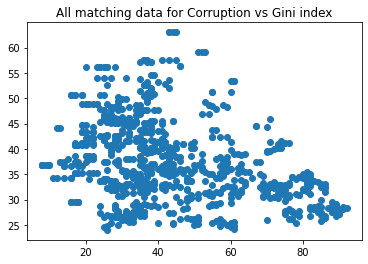

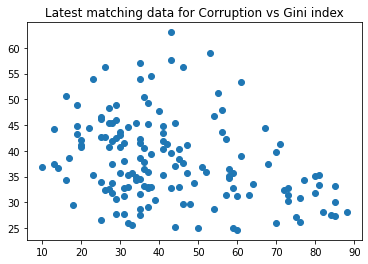

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
def plotData(inputFile,plotTitle):
    cleanedData = pd.read_csv(inputFile)

    corrData = cleanedData['Curruption']
    giniData = cleanedData['Gini']

    corrData = list(map(float, corrData))
    giniData = list(map(float, giniData))

    plt.scatter(corrData, giniData)
    plt.title(plotTitle)
    plt.show()


plotData('currGiniAll.csv', 'All matching data for Corruption(perceived) vs Gini index')
plotData('currGiniLatest.csv', 'Latest matching data for Corruption(perceived) vs Gini index')

2b)For the Gini vs Corruption scatter plot we have the perceived corruption on the X-axis and the Gini coefficient on the Y-axis. The point in the plot are very scattered. Thus it is harder to make out a clear correlation between the Gini coefficient and the perceived corruption in a country. A lower Gini index indicates a lower wealth inequality and a higher corruption prevention index indicates a lower perceived corruption. An interesting observation is the lack of point in the right top corner of the scatter plot. This is interesting as there are not any countries that has a very high wealth inequality and a very low rate of perceived corruption. If we observe the lower right corner of the plot, we see that there are countries with a low wealth inequality and also low perceived corruption. In combination with inspecting the scatter plot and the two observations above, you could make a case for a viewing the plot as some form downwards curve. But is hard to say for sure, as there are quite a lot of countries that do no follow the trend. 

In [ ]:
import numpy as np
import csv
import pandas as pd

def readFile(f):
    with open(f) as file:
        result = []
        reader = csv.reader(file)
        for row in reader:
            result.append(row)
    return result


def dataCollector():
    pov = readFile('poverty-gap-index-at-190-int-per-day-povcal.csv')
    alc = readFile('total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')
    pov = makeDict(pov)
    alc = makeDict(alc)

    result = []
    for key in alc:
        if key in pov:
            result.append([key,pov[key],alc[key]])
    return result

def makeDict(l):
    l.pop(0)
    result = {}
    for rows in l:
        result[rows[0] + rows[2]] = rows[3]
    return result

def writeToCSV(l,fileName):
    with open(fileName,'w') as file:
        writer = csv.writer(file)
        header =['Country','Poverty','Alcohol consumption']
        writer.writerow(header)
                
        for row in l:
            writer.writerow(row)

writeToCSV(dataCollector(),'povVSAlcAll.csv')


def getLatest():
    rows = dataCollector()
    result = []
    tmp=[""]
    slicer = slice(-4)
    for row in reversed(rows):
        if row[0][slicer] != tmp:
            result.insert(0,row)
            tmp = row[0][slicer]
    return result

writeToCSV(getLatest(),'povVsAlcLatest.csv')


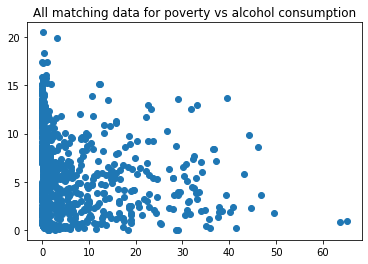

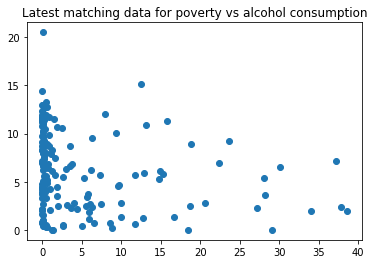

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
def plotData(inputFile,plotTitle):
    cleanedData = pd.read_csv(inputFile)

    povertyData = cleanedData['Poverty']
    alcoholData = cleanedData['Alcohol consumption']

    povertyData = list(map(float, povertyData))
    alcoholData = list(map(float, alcoholData))

    plt.scatter(povertyData, alcoholData)
    plt.title(plotTitle)
    plt.show()


plotData('povVSAlcAll.csv', 'All matching data for poverty(mean shortfall) vs alcohol consumption(L)')
plotData('povVsAlcLatest.csv', 'Latest matching data for poverty(mean shortfall) vs alcohol consumption(L)')

2b) For the scatter plot above we have the alcohol consumption in liters per person on the Y-axis and on the X-axis we have a poverty gap index where higher index indicates a higher rate of people living under the poverty line. Once again we have very scattered points, which makes it hard to intuitively find some form of pattern for a correlation. We noticed after inspecting the data set again that there are very few countries that have a high percentage of people living under the poverty line. Unfortunately based on the scatter plot, it is very hard to assert or discard our hypothesis for the a) part of the question. We suspect that the scattered data is due to alcohol consumption being tied further factors as religion and other social contexts as drinking culture etc.  